# Importing required packages

In [1]:
import tensorflow as tf
import string
import requests
import numpy as np
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Getting data from the site suing Http request

In [2]:
response = requests.get('https://www.gutenberg.org/files/98/98-0.txt')
data = response.text.split('\n')
data = data[108:]
data = " ".join(data)

# Clean function to clean the text file

In [3]:
def clean_text(doc):
  tokens = doc.split()
  table = str.maketrans('', '', string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word.lower() for word in tokens]
  return tokens


# Cleaning the data and getting tokens means words

In [4]:
tokens = clean_text(data)

# Setting the train length and getting sequences

In [5]:
train_len = 5+1
text_sequences = []
for i in range(train_len,len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)

In [6]:
sequences = {}
count = 1
for i in range(len(tokens)):
    if tokens[i] not in sequences:
        sequences[tokens[i]] = count
        count += 1

# Now we actually use the tokenizer from nltk library to convert the words or tokens in numeric values

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

# Now we get the vocabulary size and set train inputs and targets

In [10]:
vocabulary_size = len(tokenizer.word_counts)+1

n_sequences = np.empty([len(sequences),train_len], dtype='int32')
for i in range(len(sequences)):
    n_sequences[i] = sequences[i]

train_inputs = n_sequences[:,:-1]
train_targets = n_sequences[:,-1]
train_targets = to_categorical(train_targets, num_classes=vocabulary_size)
seq_len = train_inputs.shape[1]
train_inputs.shape
train_targets[0]


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

# Now we build our prediction model

In [14]:
model = Sequential()
model.add(Embedding(vocabulary_size, 50, input_length=seq_len))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocabulary_size, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train_inputs,train_targets,batch_size=256,epochs=250,verbose=1).history
model.save("nxtwordmodel.h5")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 50)             533100    
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 100)            60400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10662)             1076862   
Total params: 1,760,862
Trainable params: 1,760,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
516/516 [==============================] - 45s 87ms/step - loss: 6.8259 - accuracy: 0.0611
Epoch 2

516/516 [==============================] - 47s 90ms/step - loss: 1.5731 - accuracy: 0.6357
Epoch 71/250
516/516 [==============================] - 47s 91ms/step - loss: 1.5482 - accuracy: 0.6409
Epoch 72/250
516/516 [==============================] - 47s 91ms/step - loss: 1.5273 - accuracy: 0.6446
Epoch 73/250
516/516 [==============================] - 47s 92ms/step - loss: 1.5150 - accuracy: 0.6466
Epoch 74/250
516/516 [==============================] - 47s 91ms/step - loss: 1.4912 - accuracy: 0.6522
Epoch 75/250
516/516 [==============================] - 47s 92ms/step - loss: 1.4667 - accuracy: 0.6588
Epoch 76/250
516/516 [==============================] - 47s 90ms/step - loss: 1.4515 - accuracy: 0.6620
Epoch 77/250
516/516 [==============================] - 48s 93ms/step - loss: 1.4299 - accuracy: 0.6661
Epoch 78/250
516/516 [==============================] - 47s 92ms/step - loss: 1.4109 - accuracy: 0.6690
Epoch 79/250
516/516 [==============================] - 47s 92ms/step - loss:

516/516 [==============================] - 50s 97ms/step - loss: 0.6602 - accuracy: 0.8331
Epoch 149/250
516/516 [==============================] - 51s 100ms/step - loss: 0.6691 - accuracy: 0.8288
Epoch 150/250
516/516 [==============================] - 52s 100ms/step - loss: 0.6634 - accuracy: 0.8309
Epoch 151/250
516/516 [==============================] - 51s 99ms/step - loss: 0.6454 - accuracy: 0.8354
Epoch 152/250
516/516 [==============================] - 53s 102ms/step - loss: 0.6427 - accuracy: 0.8357
Epoch 153/250
516/516 [==============================] - 53s 102ms/step - loss: 0.6375 - accuracy: 0.8377
Epoch 154/250
516/516 [==============================] - 52s 101ms/step - loss: 0.6223 - accuracy: 0.8411
Epoch 155/250
516/516 [==============================] - 52s 100ms/step - loss: 0.6133 - accuracy: 0.8430
Epoch 156/250
516/516 [==============================] - 53s 102ms/step - loss: 0.6025 - accuracy: 0.8460
Epoch 157/250
516/516 [==============================] - 52s 1

# Model accuracy graph

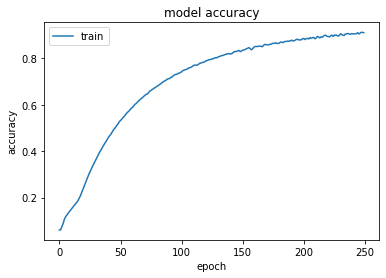

In [16]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Model loss graph

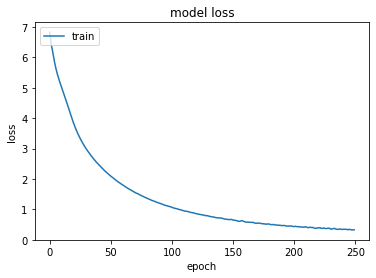

In [17]:
plt.plot(history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [19]:
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
print(encoded_text, pad_encoded)
for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:",pred_word)

there was a time when
[37, 11, 5, 68, 44] [[37 11  5 68 44]]
Next word suggestion: he
Next word suggestion: i
Next word suggestion: the


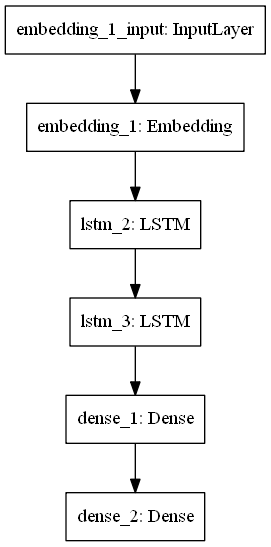

In [1]:
from tensorflow import keras
from tensorflow.keras.models import load_model
from keras.utils.vis_utils import plot_model

nextwordmodel=keras.models.load_model("nxtwordmodel.h5")

keras.utils.plot_model(nextwordmodel, to_file='nextwordmodel.png', show_layer_names=True)